In [1]:
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import statsmodels.api as sm


In [2]:
data_path = 'scores.csv'

df = pd.read_csv(data_path)
df = df.drop(columns=["run_name"])

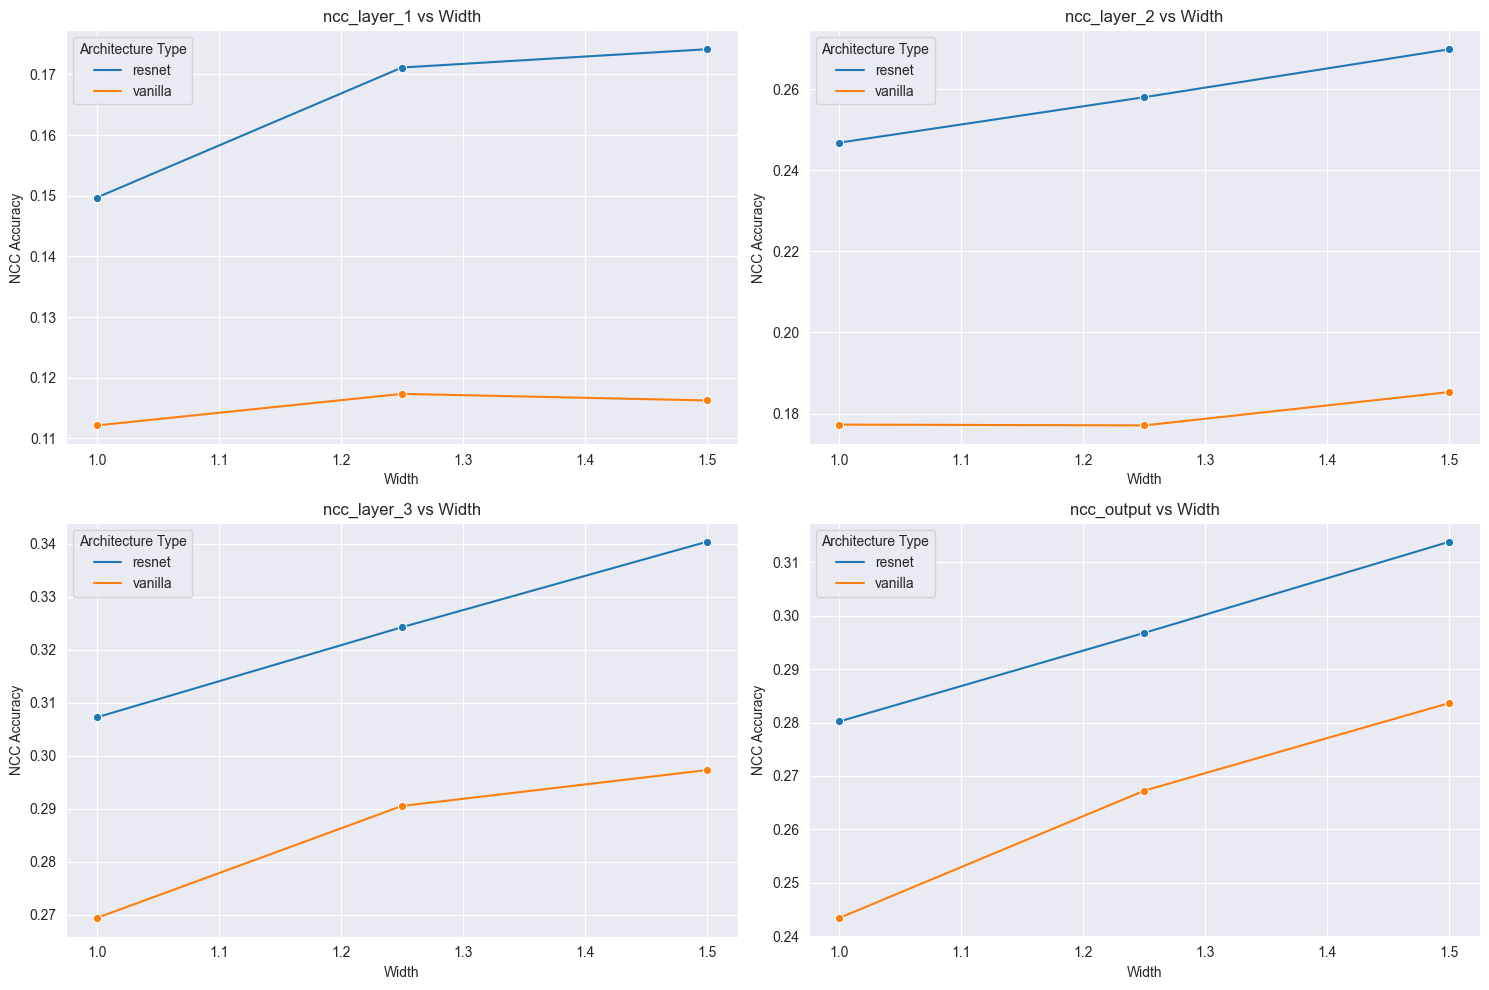

In [17]:
# Filter data for the records at epoch=999
df_epoch_999 = df[df['epoch'] == 999]

# Group the data by architecture type and width
grouped_df = df_epoch_999.groupby(['architecture_type', 'width']).mean().reset_index()
# grouped_df = df
# Plotting
plt.figure(figsize=(15, 10))

# Create subplots for each layer
for idx, layer in enumerate(['ncc_layer_1', 'ncc_layer_2', 'ncc_layer_3', 'ncc_output'], 1):
    plt.subplot(2, 2, idx)
    sns.lineplot(data=grouped_df, x='width', y=layer, hue='architecture_type', marker='o')
    plt.title(f'{layer} vs Width')
    plt.xlabel('Width')
    plt.ylabel('NCC Accuracy')
    plt.legend(title='Architecture Type')

plt.tight_layout()
plt.show()


In [4]:

# Initialize a dictionary to store the results
linear_model_results = {}

# Loop through each architecture type and layer to fit linear models
for arch_type in grouped_df['architecture_type'].unique():
    linear_model_results[arch_type] = {}
    for layer in ['ncc_layer_1', 'ncc_layer_2', 'ncc_layer_3', 'ncc_output']:
        # Subset data
        subset_data = grouped_df[grouped_df['architecture_type'] == arch_type]
        
        # Add constant term for intercept in the model
        X = sm.add_constant(subset_data['width'])
        y = subset_data[layer]
        
        # Fit the linear model
        model = sm.OLS(y, X).fit()
        
        # Store the model summary
        linear_model_results[arch_type][layer] = model.params

# Display the model results
pd.DataFrame(linear_model_results)


,resnet,vanilla
ncc_input,const 9.210000e-02 width -2.920997e-17 dt...,const 9.210000e-02 width -2.920997e-17 dt...
ncc_layer_1,const 0.103869 width 0.048900 dtype: flo...,const 0.104947 width 0.008233 dtype: flo...
ncc_layer_2,const 0.200647 width 0.046100 dtype: flo...,const 0.159794 width 0.016067 dtype: flo...
ncc_layer_3,const 0.241194 width 0.066200 dtype: flo...,const 0.216089 width 0.055733 dtype: flo...
ncc_output,const 0.212922 width 0.067200 dtype: flo...,const 0.164336 width 0.080367 dtype: flo...


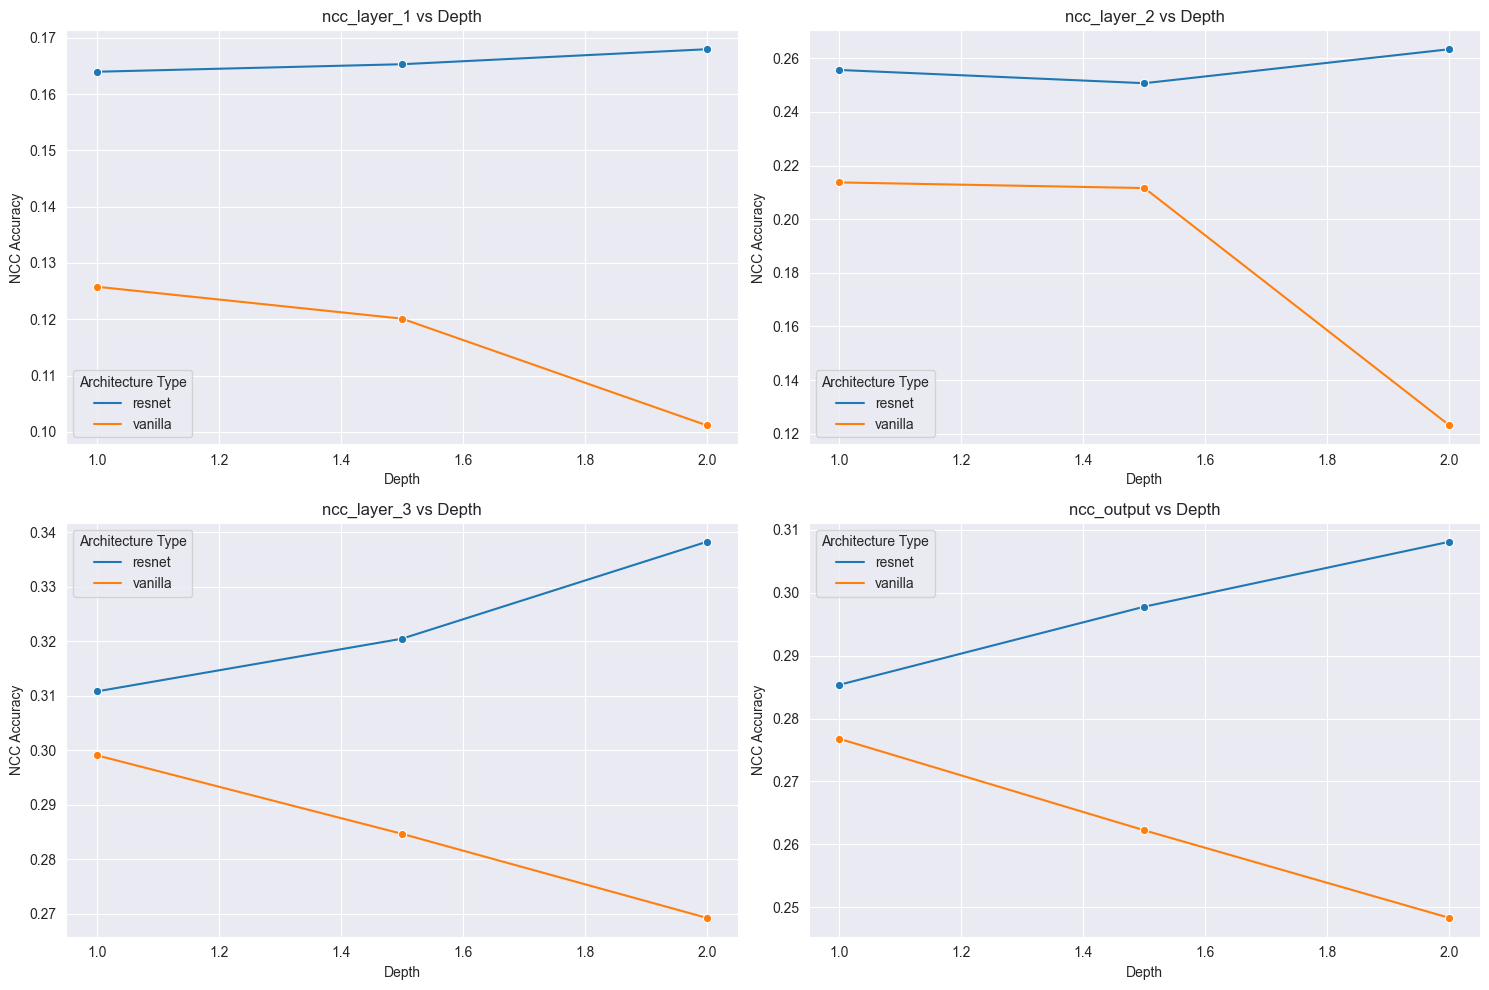

In [13]:
# Filter data for the records at epoch=999
df_epoch_999 = df[df['epoch'] == 999]

# Group the data by architecture type and width
grouped_df = df_epoch_999.groupby(['architecture_type', 'depth']).mean().reset_index()

# Plotting
plt.figure(figsize=(15, 10))

# Create subplots for each layer
for idx, layer in enumerate(['ncc_layer_1', 'ncc_layer_2', 'ncc_layer_3', 'ncc_output'], 1):
    plt.subplot(2, 2, idx)
    sns.lineplot(data=grouped_df, x='depth', y=layer, hue='architecture_type', marker='o')
    plt.title(f'{layer} vs Depth')
    plt.xlabel('Depth')
    plt.ylabel('NCC Accuracy')
    plt.legend(title='Architecture Type')

plt.tight_layout()
plt.show()

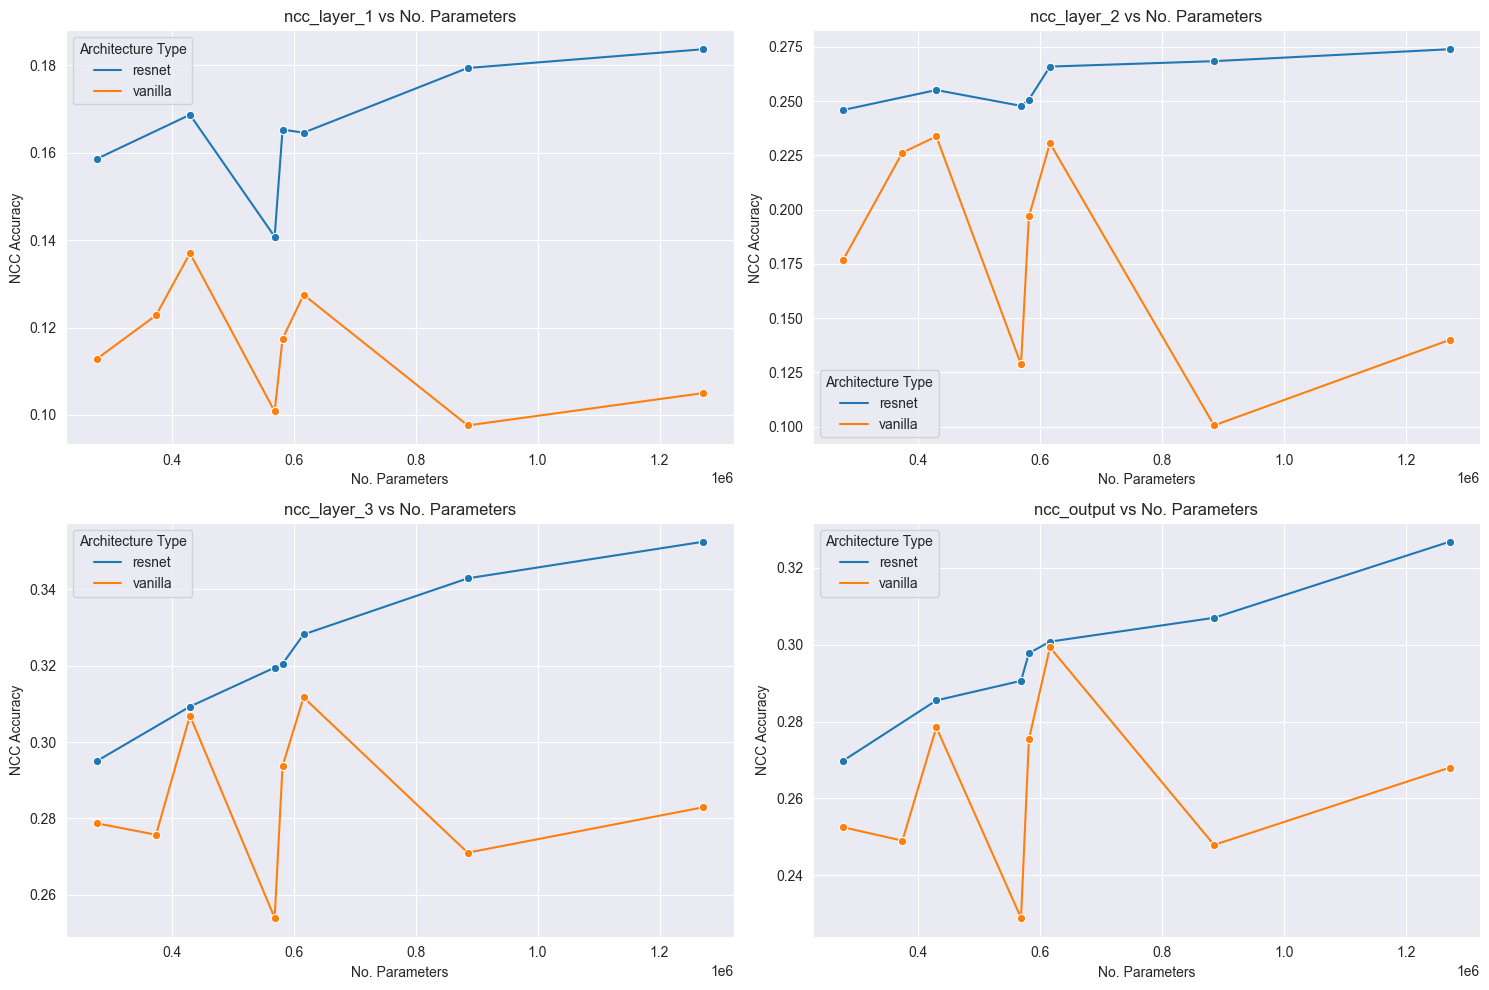

In [19]:
# Filter data for the records at epoch=999
df_epoch_999 = df[df['epoch'] == 999]

# Group the data by architecture type and width
grouped_df = df_epoch_999.groupby(['num_parameters', 'architecture_type']).mean().reset_index()

# Plotting
plt.figure(figsize=(15, 10))

# Create subplots for each layer
for idx, layer in enumerate(['ncc_layer_1', 'ncc_layer_2', 'ncc_layer_3', 'ncc_output'], 1):
    plt.subplot(2, 2, idx)
    sns.lineplot(data=grouped_df, x='num_parameters', y=layer, hue='architecture_type', marker='o')
    plt.title(f'{layer} vs No. Parameters')
    plt.xlabel('No. Parameters')
    plt.ylabel('NCC Accuracy')
    plt.legend(title='Architecture Type')

plt.tight_layout()
plt.show()

In [20]:
grouped_df

,num_parameters,architecture_type,ncc_input,ncc_input_std,ncc_layer_1,ncc_layer_1_std,ncc_layer_2,ncc_layer_2_std,ncc_layer_3,ncc_layer_3_std,ncc_output,ncc_output_std,width,depth,epoch
0,277376,resnet,0.0921,0.004682,0.1586,0.008583,0.2459,0.011632,0.2950,0.008761,0.2698,0.012112,1.00,1.0,999.0
1,277376,vanilla,0.0921,0.004682,0.1128,0.009808,0.1768,0.011719,0.2787,0.009004,0.2525,0.005087,1.00,1.0,999.0
2,374592,vanilla,0.0921,0.004682,0.1228,0.004222,0.2263,0.004907,0.2757,0.007981,0.2490,0.009083,1.00,1.5,999.0
3,430208,resnet,0.0921,0.004682,0.1687,0.008438,0.2551,0.009051,0.3093,0.008786,0.2855,0.005948,1.25,1.0,999.0
4,430208,vanilla,0.0921,0.004682,0.1370,0.006052,0.2337,0.008969,0.3069,0.004788,0.2785,0.004677,1.25,1.0,999.0
5,569024,resnet,0.0921,0.004682,0.1408,0.004009,0.2478,0.013330,0.3195,0.006919,0.2906,0.005792,1.00,2.0,999.0
6,569024,vanilla,0.0921,0.004682,0.1008,0.009654,0.1287,0.008243,0.2539,0.006407,0.2289,0.005910,1.00,2.0,999.0
7,581968,resnet,0.0921,0.004682,0.1653,0.011256,0.2507,0.009418,0.3205,0.005232,0.2978,0.007319,1.25,1.5,999.0
8,581968,vanilla,0.0921,0.004682,0.1174,0.009762,0.1969,0.010015,0.2937,0.008281,0.2754,0.006436,1.25,1.5,999.0
9,616448,resnet,0.0921,0.004682,0.1646,0.012295,0.2659,0.007352,0.3282,0.007831,0.3008,0.004881,1.50,1.0,999.0


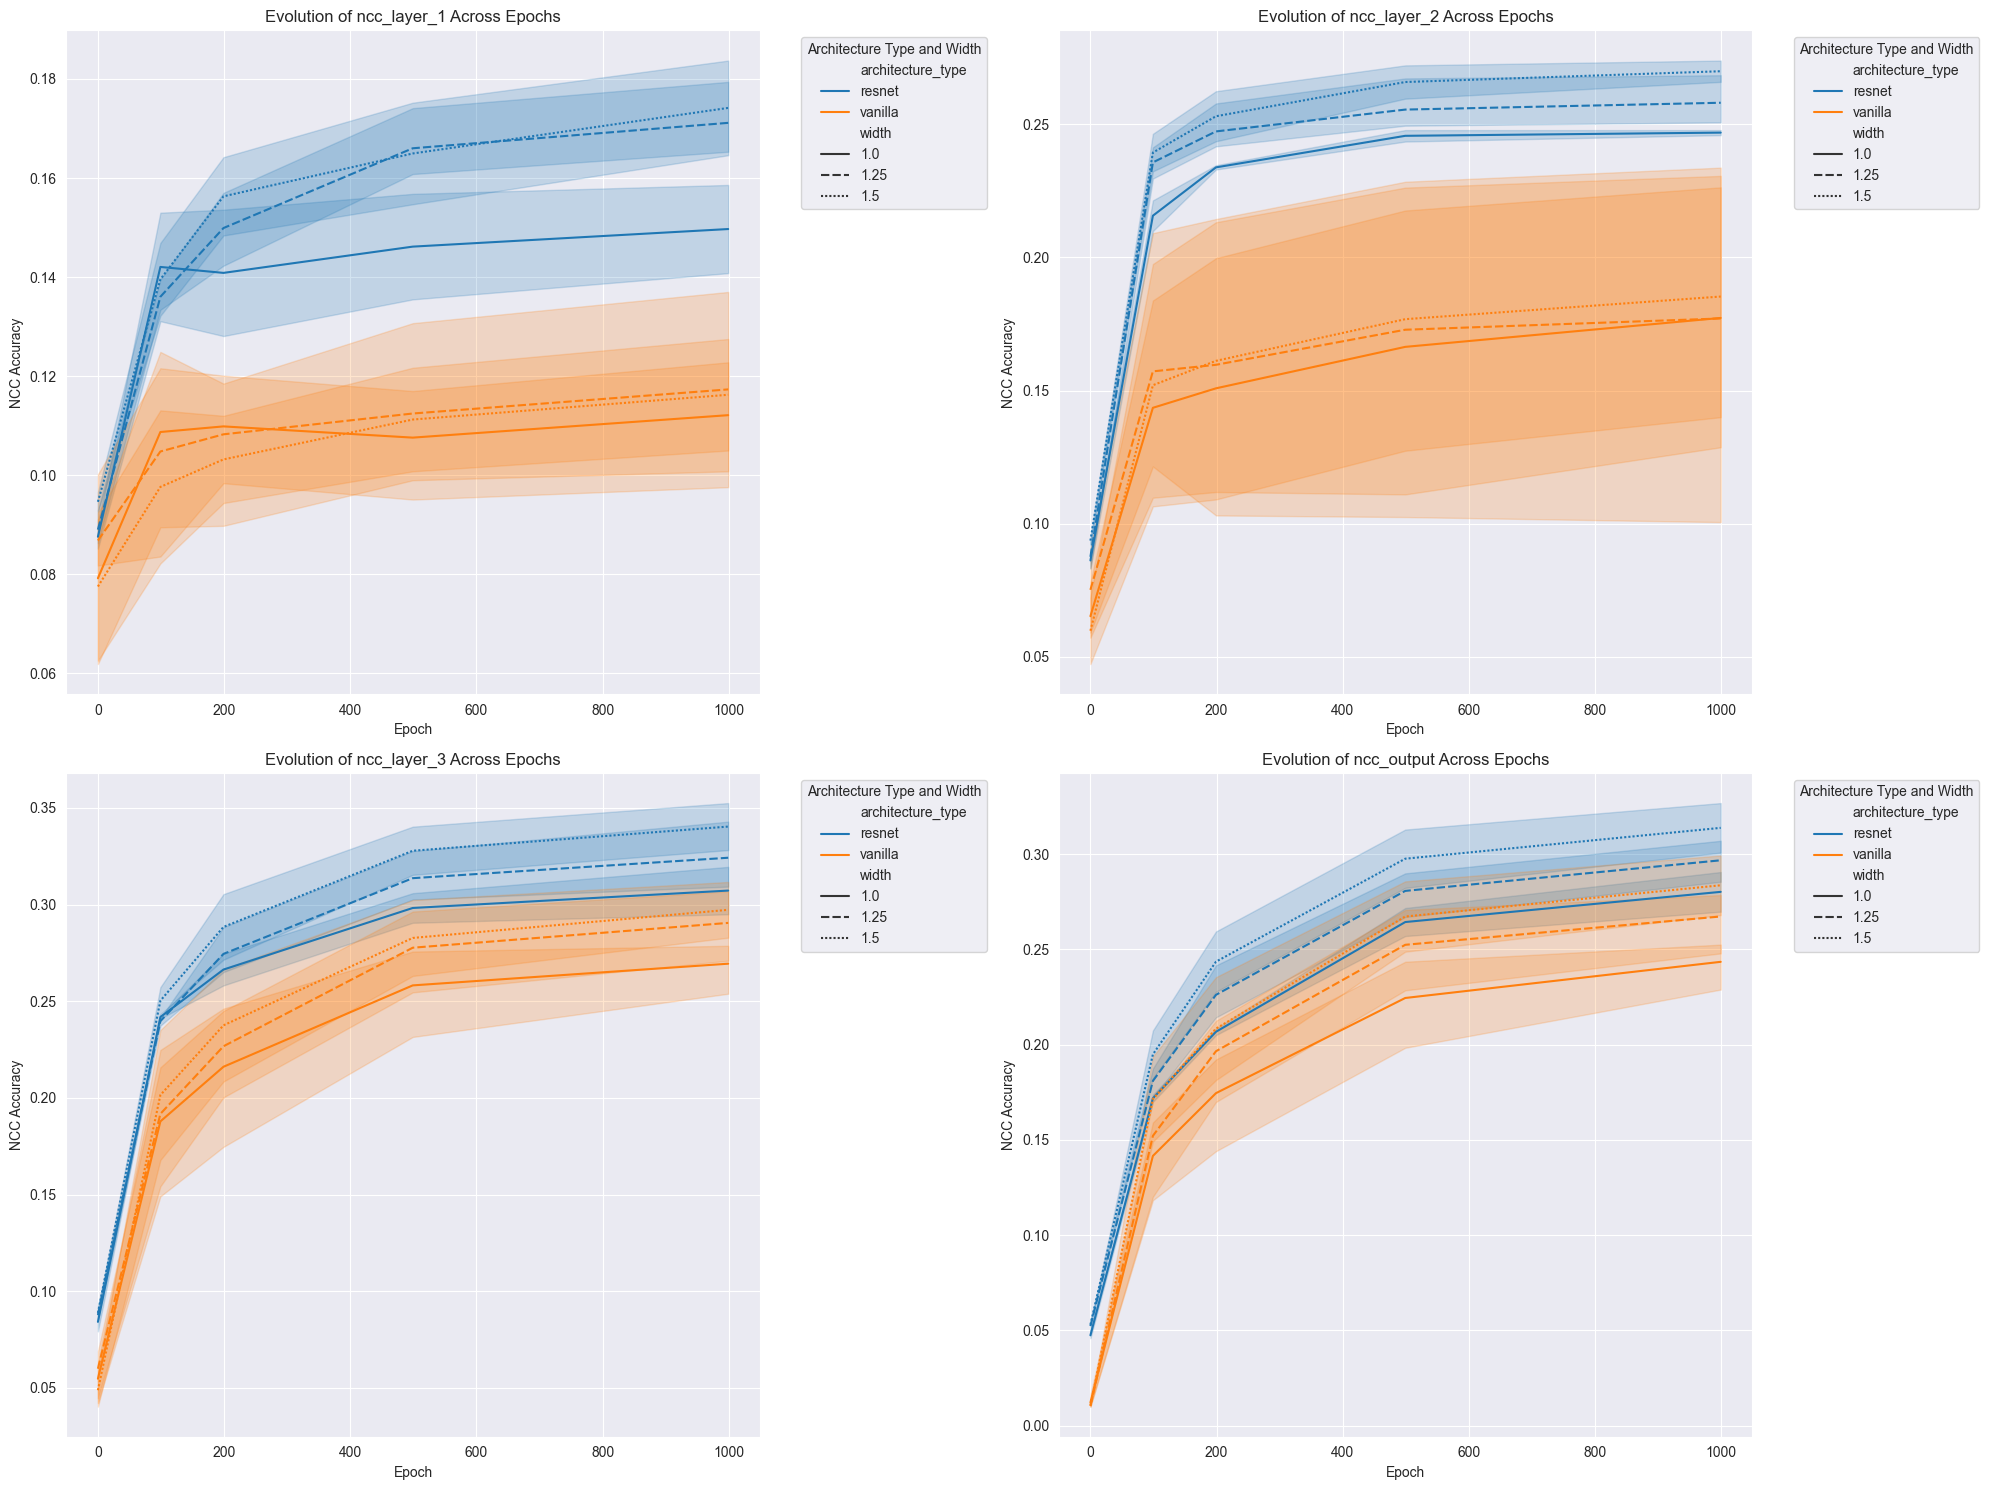

In [22]:
# Group the data by architecture type, width, depth, and epoch
grouped_epoch_df = df.groupby(['architecture_type', 'width', 'depth', 'epoch']).mean().reset_index()

# Initialize the plot
plt.figure(figsize=(20, 15))

# Create subplots for each layer
for idx, layer in enumerate(['ncc_layer_1', 'ncc_layer_2', 'ncc_layer_3', 'ncc_output'], 1):
    plt.subplot(2, 2, idx)
    
    # Use seaborn to create a lineplot with hue based on architecture type and style based on width
    sns.lineplot(data=grouped_epoch_df, x='epoch', y=layer, hue='architecture_type', style='width')
    
    plt.title(f'Evolution of {layer} Across Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('NCC Accuracy')
    plt.legend(title='Architecture Type and Width', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
